1. Прокартируйте все образцы при помощи hisat2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -y -c bioconda hisat2

!wget http://ftp.ensembl.org/pub/release-107/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz
!wget http://ftp.ensembl.org/pub/release-107/gtf/mus_musculus/Mus_musculus.GRCm39.107.chr.gtf.gz
!gunzip ./*

!grep -P '^19\t' Mus_musculus.GRCm39.107.chr.gtf > Mus_musculus.GRCm39.107.chr19.gtf

!hisat2-build Mus_musculus.GRCm39.dna.chromosome.19.fa Mus_musculus.GRCm39.dna.chromosome.19

!hisat2_extract_splice_sites.py Mus_musculus.GRCm39.107.chr19.gtf > Mus_musculus.GRCm39.107.chr19.ss
for i in ['B14.5','B15.5','B17.5','B20','B34','C14.5','C15.5','C17.5','C20','C34']:
  !hisat2 --no-softclip --known-splicesite-infile Mus_musculus.GRCm39.107.chr19.ss -x Mus_musculus.GRCm39.dna.chromosome.19 -U ./drive/MyDrive/NGS/rna.seq.data/{i}.fq.gz -S {i}.sam

Mounted at /content/drive
⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:26
🔁 Restarting kernel...
Solving environment: / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - hisat2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    hisat2-2.2.1               |       h87f3376_4        16.5 MB  bioconda
    openssl-1.1.1q             |       h166bdaf_1         2.1 MB  conda-forge
    perl-5.32.1            

2. Соберите транскрипты при помощи stringtie для каждого образца
используя аннотацию из ensembl (-G)

In [ ]:
!conda install -y -c bioconda samtools
!conda install -y -c bioconda stringtie

for i in ['B14.5','B15.5','B17.5','B20','B34','C14.5','C15.5','C17.5','C20','C34']:
  !samtools view -Sb {i}.sam > {i}.bam
  !samtools sort -m 500M -o {i}.s.bam {i}.bam

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    samtools-1.3               |                0         1.5 MB  bioconda
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

  samtools           bioconda/linux-64::samtools-1.3-0 None



samtools-1.3         | 1.5 MB    | : 100% 1.0/1 [00:00<00:00,  2.22it/s]
Preparing transaction: | done
Verifying transaction: - done
Executing transaction: | done
Retrieving notices: ...working... done
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ 

In [ ]:
for i in ['B14.5','B15.5','B17.5','B20','B34','C14.5','C15.5','C17.5','C20','C34']:
  !stringtie {i}.s.bam -o {i}.gtf -G Mus_musculus.GRCm39.107.chr19.gtf

In [ ]:
!ls -1 ./*gtf > gtf.list
!stringtie --merge gtf.list -G Mus_musculus.GRCm39.107.chr19.gtf -o merged.gtf

3. Перекартируйте риды используя новую аннотацию

In [ ]:
!hisat2_extract_splice_sites.py merged.gtf > merged.ss

for i in ['B14.5','B15.5','B17.5','B20','B34','C14.5','C15.5','C17.5','C20','C34']:
  !hisat2 --no-softclip --known-splicesite-infile merged.ss -x Mus_musculus.GRCm39.dna.chromosome.19 -U ./drive/MyDrive/NGS/rna.seq.data/{i}.fq.gz -S {i}.stringtie.sam

599672 reads; of these:
  599672 (100.00%) were unpaired; of these:
    46863 (7.81%) aligned 0 times
    540444 (90.12%) aligned exactly 1 time
    12365 (2.06%) aligned >1 times
92.19% overall alignment rate
599345 reads; of these:
  599345 (100.00%) were unpaired; of these:
    70663 (11.79%) aligned 0 times
    517109 (86.28%) aligned exactly 1 time
    11573 (1.93%) aligned >1 times
88.21% overall alignment rate
600006 reads; of these:
  600006 (100.00%) were unpaired; of these:
    74928 (12.49%) aligned 0 times
    515369 (85.89%) aligned exactly 1 time
    9709 (1.62%) aligned >1 times
87.51% overall alignment rate
599777 reads; of these:
  599777 (100.00%) were unpaired; of these:
    51008 (8.50%) aligned 0 times
    538245 (89.74%) aligned exactly 1 time
    10524 (1.75%) aligned >1 times
91.50% overall alignment rate
599683 reads; of these:
  599683 (100.00%) were unpaired; of these:
    51701 (8.62%) aligned 0 times
    539461 (89.96%) aligned exactly 1 time
    8521 (1.42

In [ ]:
for i in ['B14.5','B15.5','B17.5','B20','B34','C14.5','C15.5','C17.5','C20','C34']:
  !samtools view -Sb {i}.stringtie.sam > {i}.stringtie.bam
  !samtools sort -o {i}.stringtie.s.bam {i}.stringtie.bam
  !samtools index {i}.stringtie.s.bam

5. Постройте PCA и heatmap (коэффициент корреляции Спирмана)
для образцов

In [ ]:
import pandas as pd
df=pd.DataFrame(pd.read_csv('empty_genes.tsv', sep='\t', index_col='GeneID'))

for i in ['B14.5','B15.5','B17.5','B20','B34','C14.5','C15.5','C17.5','C20','C34']:
  tsvfile=i+'.tsv'
  df_i=pd.DataFrame(pd.read_csv(tsvfile, sep='\t', index_col='GeneID'))
  expr_column=i+'.stringtie.s.bam'
  df=pd.concat([df, df_i.loc[:,expr_column]], axis=1)

df.fillna(0, inplace=True)
df.drop(columns='Length', inplace=True)
df.to_csv('GenewiseCounts.csv')

In [ ]:
df_corr=df.corr(method='spearman')
df_corr.head()

,B14.5.stringtie.s.bam,B15.5.stringtie.s.bam,B17.5.stringtie.s.bam,B20.stringtie.s.bam,B34.stringtie.s.bam,C14.5.stringtie.s.bam,C15.5.stringtie.s.bam,C17.5.stringtie.s.bam,C20.stringtie.s.bam,C34.stringtie.s.bam
B14.5.stringtie.s.bam,1.000000,0.939663,0.927209,0.924820,0.907499,0.919674,0.918106,0.913568,0.921220,0.909418
B15.5.stringtie.s.bam,0.939663,1.000000,0.934060,0.935633,0.912117,0.924463,0.917802,0.918325,0.919936,0.915049
B17.5.stringtie.s.bam,0.927209,0.934060,1.000000,0.934468,0.910168,0.926357,0.927822,0.915281,0.923960,0.914141
B20.stringtie.s.bam,0.924820,0.935633,0.934468,1.000000,0.918066,0.924835,0.926329,0.919232,0.934501,0.921952
B34.stringtie.s.bam,0.907499,0.912117,0.910168,0.918066,1.000000,0.910766,0.899124,0.900465,0.916666,0.913023


PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df_corr)

print(pca.explained_variance_ratio_)

[0.21582109 0.15350414]


In [ ]:
df_pca = pd.DataFrame(data = x_pca,
                      index = ['B14.5','B15.5','B17.5','B20','B34','C14.5','C15.5','C17.5','C20','C34'],
                      columns = ['pc_1', 'pc_2'])

print(df_pca)

           pc_1      pc_2
B14.5 -0.030287  0.043662
B15.5 -0.029303  0.045070
B17.5 -0.031767  0.011738
B20   -0.012501  0.006630
B34    0.081659  0.033649
C14.5 -0.011235 -0.019151
C15.5 -0.030662 -0.044644
C17.5  0.007693 -0.034314
C20    0.002073 -0.025792
C34    0.054332 -0.016849


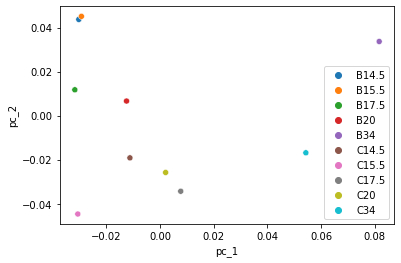

In [ ]:
import seaborn as sns

sns.scatterplot(data=df_pca, x='pc_1', y='pc_2', hue=df_pca.index)

MDS

In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
x_mds = mds.fit_transform(df_corr)

df_mds = pd.DataFrame(data = x_mds,
                      index = ['B14.5','B15.5','B17.5','B20','B34','C14.5','C15.5','C17.5','C20','C34'],
                      columns = ['d_1', 'd_2'])

print(df_mds)

            d_1       d_2
B14.5 -0.063328 -0.023302
B15.5 -0.040949  0.060827
B17.5  0.004757  0.069508
B20   -0.002238  0.014181
B34    0.106004 -0.006948
C14.5  0.051892  0.051582
C15.5 -0.032649 -0.067856
C17.5 -0.093542  0.020924
C20    0.038608 -0.030731
C34    0.031444 -0.088184


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:518: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  "The MDS API has changed. ``fit`` now constructs an"


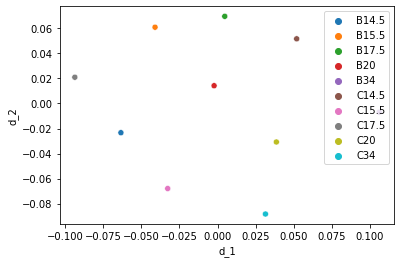

In [ ]:
import seaborn as sns

sns.scatterplot(data=df_mds, x='d_1', y='d_2', hue=df_mds.index)

heatmap & clustermap

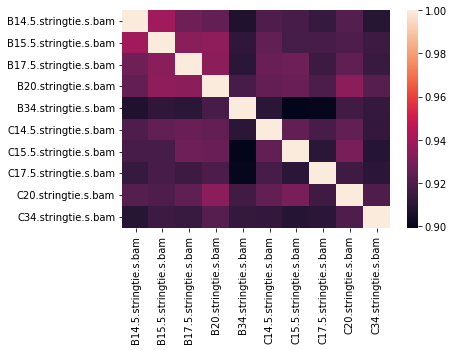

In [ ]:
sns.heatmap(data=df_corr)

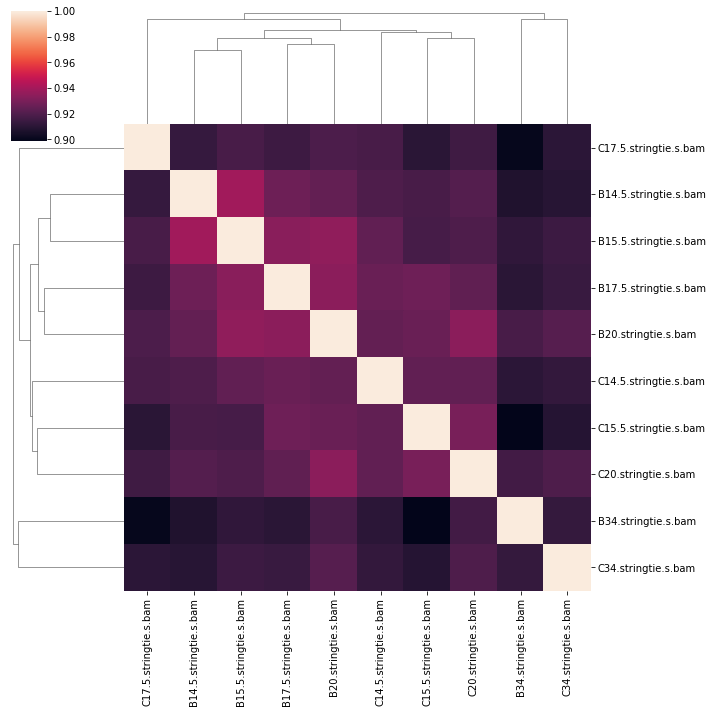

In [ ]:
sns.clustermap(data=df_corr)